In [ ]:
# SKLearn Implemention
from sklearn.metrics import log_loss
log_loss(["REAL", "FAKE", "FAKE", "REAL"],
         [[.1, .9], [.9, .1], [.8, .2], [.35, .65]])

0.21616187468057912

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import cv2
plt.style.use('ggplot')
from IPython.display import Video
from IPython.display import HTML

## Take a look at the input folder files

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c deepfake-detection-challenge

100% 4.13G/4.13G [00:42<00:00, 163MB/s]
100% 4.13G/4.13G [00:42<00:00, 104MB/s]


In [ ]:
!unzip deepfake-detection-challenge.zip

Archive:  deepfake-detection-challenge.zip
  inflating: sample_submission.csv   
  inflating: test_videos/aassnaulhq.mp4  
  inflating: test_videos/aayfryxljh.mp4  
  inflating: test_videos/acazlolrpz.mp4  
  inflating: test_videos/adohdulfwb.mp4  
  inflating: test_videos/ahjnxtiamx.mp4  
  inflating: test_videos/ajiyrjfyzp.mp4  
  inflating: test_videos/aktnlyqpah.mp4  
  inflating: test_videos/alrtntfxtd.mp4  
  inflating: test_videos/aomqqjipcp.mp4  
  inflating: test_videos/apedduehoy.mp4  
  inflating: test_videos/apvzjkvnwn.mp4  
  inflating: test_videos/aqrsylrzgi.mp4  
  inflating: test_videos/axfhbpkdlc.mp4  
  inflating: test_videos/ayipraspbn.mp4  
  inflating: test_videos/bcbqxhziqz.mp4  
  inflating: test_videos/bcvheslzrq.mp4  
  inflating: test_videos/bdshuoldwx.mp4  
  inflating: test_videos/bfdopzvxbi.mp4  
  inflating: test_videos/bfjsthfhbd.mp4  
  inflating: test_videos/bjyaxvggle.mp4  
  inflating: test_videos/bkcyglmfci.mp4  
  inflating: test_videos/bktkwbcawi.m

In [ ]:
!ls -GFlash .

total 4.2G
4.0K drwxr-xr-x 1 root 4.0K Mar 24 09:52 ./
4.0K drwxr-xr-x 1 root 4.0K Mar 24 09:49 ../
4.0K drwxr-xr-x 4 root 4.0K Mar 21 13:23 .config/
4.2G -rw-r--r-- 1 root 4.2G Dec 10  2019 deepfake-detection-challenge.zip
4.0K drwxr-xr-x 1 root 4.0K Mar 21 13:23 sample_data/
8.0K -rw-r--r-- 1 root 6.7K Dec 10  2019 sample_submission.csv
 20K drwxr-xr-x 2 root  20K Mar 24 09:52 test_videos/
 20K drwxr-xr-x 2 root  20K Mar 24 09:53 train_sample_videos/


In [ ]:
train_sample_metadata = pd.read_json('train_sample_videos/metadata.json').T
train_sample_metadata.head()

label  split        original
aagfhgtpmv.mp4  FAKE  train  vudstovrck.mp4
aapnvogymq.mp4  FAKE  train  jdubbvfswz.mp4
abarnvbtwb.mp4  REAL  train            None
abofeumbvv.mp4  FAKE  train  atvmxvwyns.mp4
abqwwspghj.mp4  FAKE  train  qzimuostzz.mp4

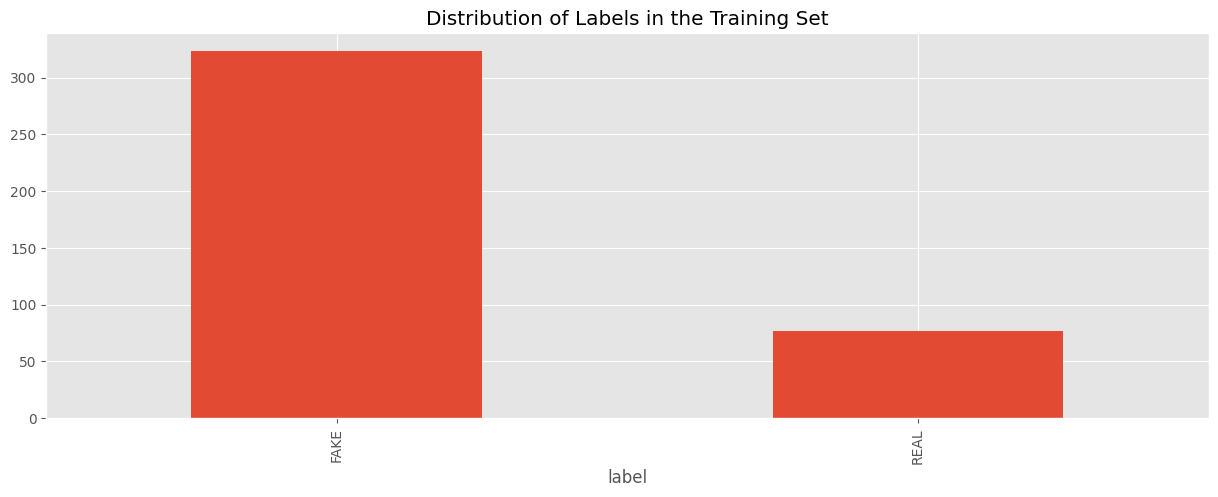

In [ ]:
train_sample_metadata.groupby('label')['label'].count().plot(figsize=(15, 5), kind='bar', title='Distribution of Labels in the Training Set')
plt.show()

## Example of fake: `aagfhgtpmv.mp4`
![](https://i.imgur.com/ToWjusQ.gif)

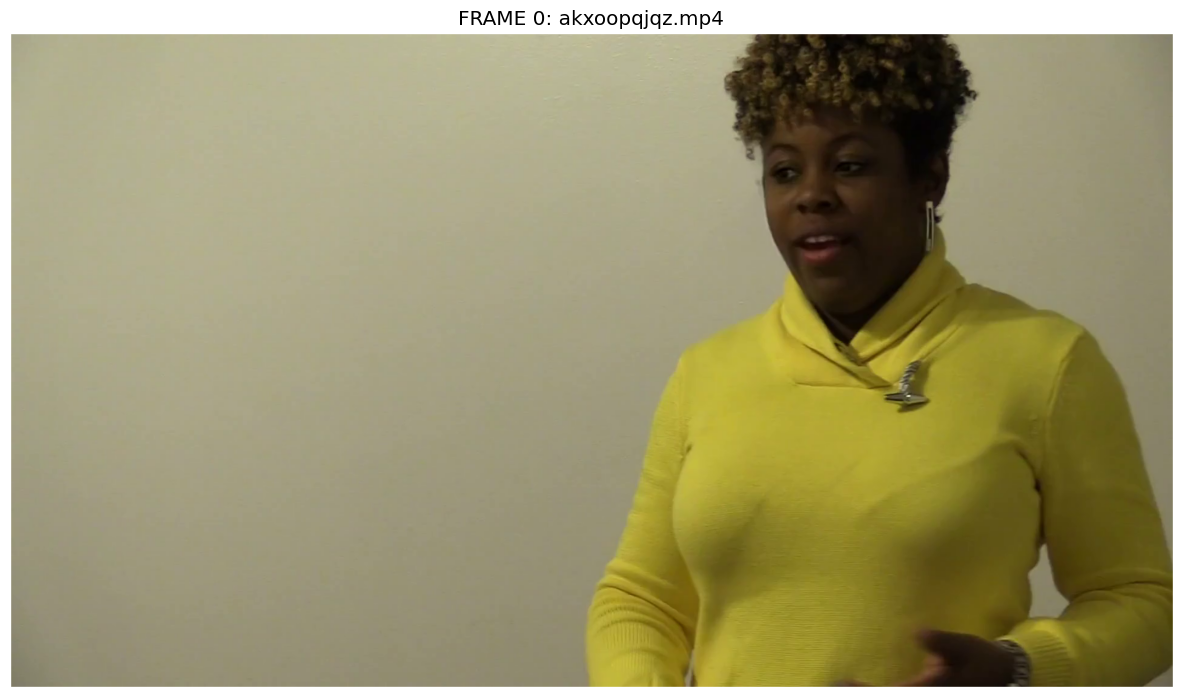

In [ ]:
import cv2 as cv
import os
import matplotlib.pylab as plt
train_dir = 'train_sample_videos/'
fig, ax = plt.subplots(1,1, figsize=(15, 15))
train_video_files = [train_dir + x for x in os.listdir(train_dir)]
# video_file = train_video_files[30]
video_file = 'train_sample_videos/akxoopqjqz.mp4'
cap = cv.VideoCapture(video_file)
success, image = cap.read()
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
cap.release()
ax.imshow(image)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.title.set_text(f"FRAME 0: {video_file.split('/')[-1]}")
plt.grid(False)

Now lets use opencv to detect the faces using the `face_recognition` package! First we need to pip install it. Make sure you have internet turned on in your kernel.

Reference: https://github.com/ageitgey/face_recognition

In [ ]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=977cf3828b196825994a90c88fc23a21f754cd75b3676cf4e262303fd584d941
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


## Locating a face within an image

I found 1 face(s) in this photograph.
A face is located at pixel location Top: 99, Left: 1168, Bottom: 420, Right: 1489


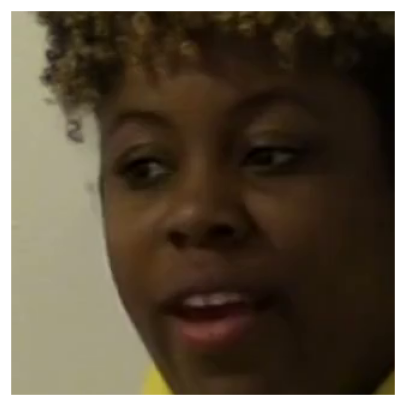

In [ ]:
import face_recognition
face_locations = face_recognition.face_locations(image)


from PIL import Image

print("I found {} face(s) in this photograph.".format(len(face_locations)))

for face_location in face_locations:


    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    face_image = image[top:bottom, left:right]
    fig, ax = plt.subplots(1,1, figsize=(5, 5))
    plt.grid(False)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.imshow(face_image)

## Locating a face landmarks within an image

In [ ]:
face_landmarks_list = face_recognition.face_landmarks(image)

The chin in this face has the following points: [(1247, 239), (1245, 268), (1247, 297), (1255, 328), (1268, 358), (1285, 387), (1304, 416), (1323, 438), (1350, 445), (1383, 439), (1419, 423), (1453, 399), (1482, 370), (1501, 335), (1507, 295), (1505, 256), (1501, 219)]
The left_eyebrow in this face has the following points: [(1251, 198), (1257, 185), (1272, 181), (1288, 183), (1304, 190)]
The right_eyebrow in this face has the following points: [(1342, 184), (1362, 171), (1386, 165), (1411, 170), (1432, 181)]
The nose_bridge in this face has the following points: [(1324, 219), (1323, 235), (1320, 250), (1319, 267)]
The nose_tip in this face has the following points: [(1301, 294), (1313, 298), (1327, 299), (1343, 296), (1358, 293)]
The left_eye in this face has the following points: [(1264, 234), (1273, 227), (1287, 226), (1303, 230), (1289, 235), (1275, 237)]
The right_eye in this face has the following points: [(1365, 224), (1378, 215), (1394, 215), (1410, 219), (1395, 224), (1379, 22

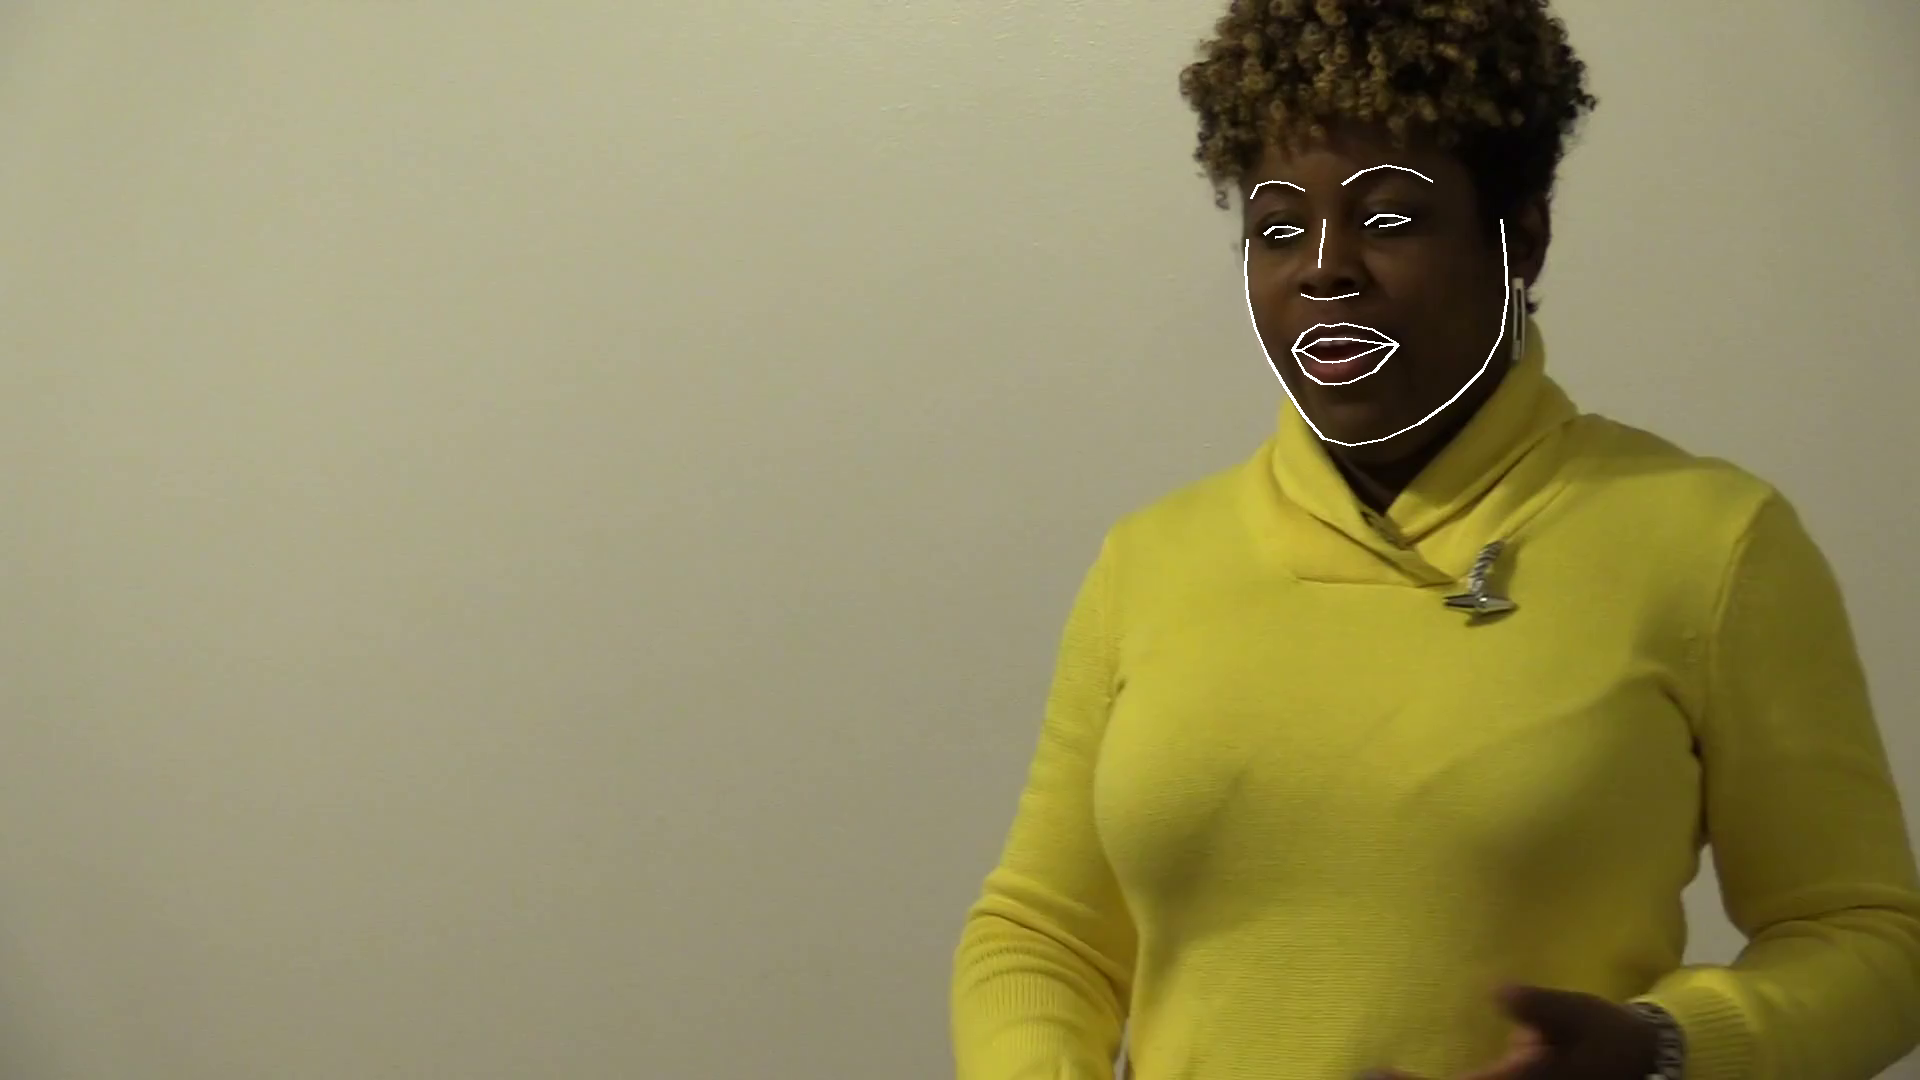

In [ ]:
# https://github.com/ageitgey/face_recognition/blob/master/examples/find_facial_features_in_picture.py
# face_landmarks_list
from PIL import Image, ImageDraw
pil_image = Image.fromarray(image)
d = ImageDraw.Draw(pil_image)

for face_landmarks in face_landmarks_list:

    # Print the location of each facial feature in this image
    for facial_feature in face_landmarks.keys():
        print("The {} in this face has the following points: {}".format(facial_feature, face_landmarks[facial_feature]))

    # Let's trace out each facial feature in the image with a line!
    for facial_feature in face_landmarks.keys():
        d.line(face_landmarks[facial_feature], width=3)

# Show the picture
display(pil_image)

# Displaying many test examples and labels
Can you tell which are fakes?

IndexError: list index out of range

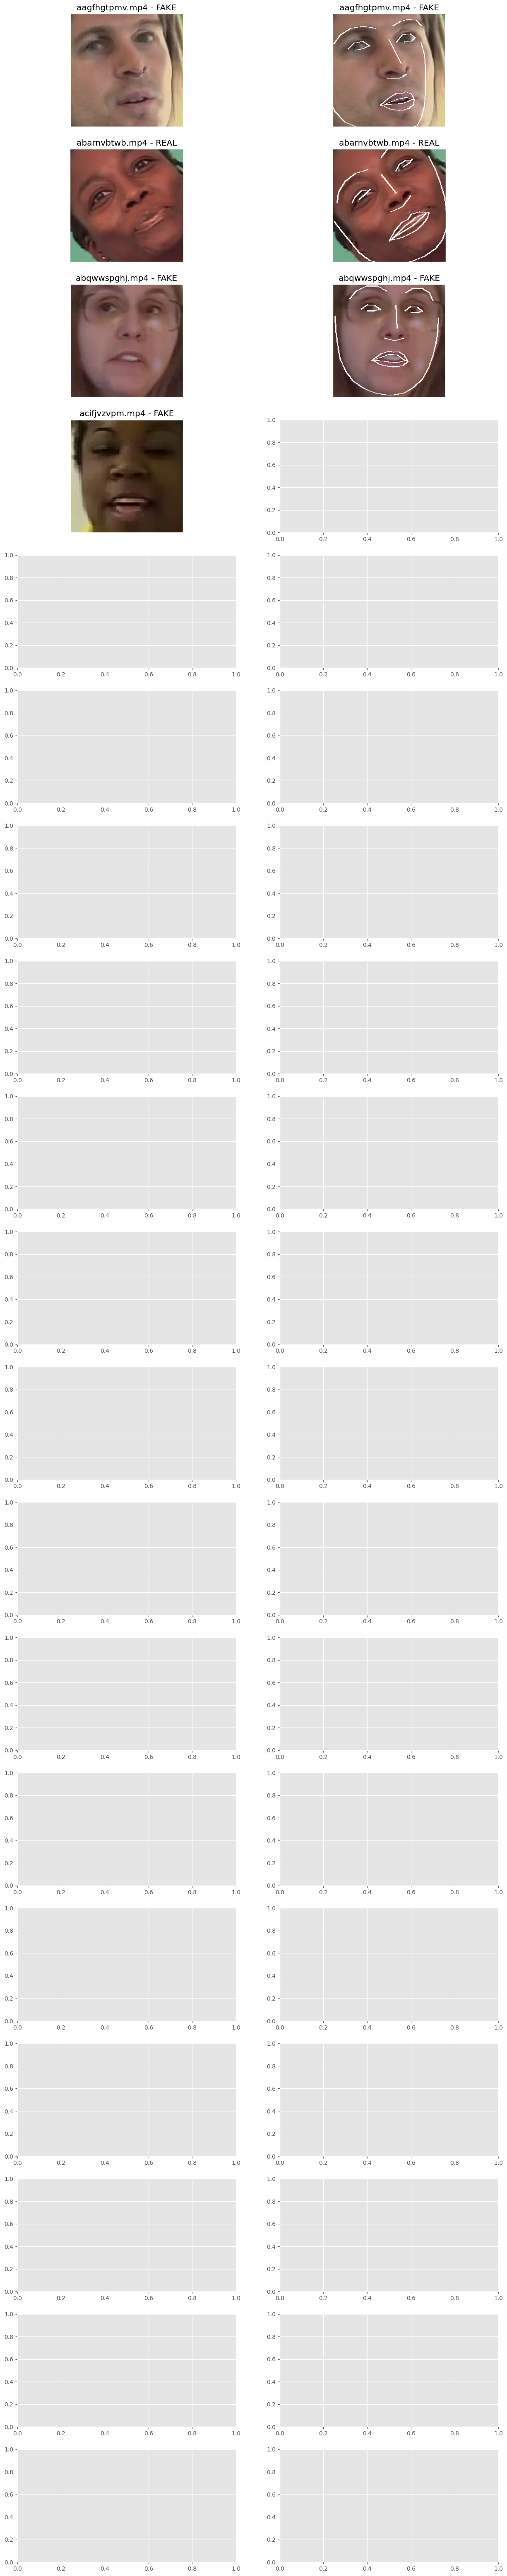

In [ ]:
fig, axs = plt.subplots(19, 2, figsize=(15, 80))
axs = np.array(axs)
axs = axs.reshape(-1)
i = 0
for fn in train_sample_metadata.index[:23]:
    label = train_sample_metadata.loc[fn]['label']
    orig = train_sample_metadata.loc[fn]['label']
    video_file = f'train_sample_videos/{fn}'
    ax = axs[i]
    cap = cv.VideoCapture(video_file)
    success, image = cap.read()
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    face_locations = face_recognition.face_locations(image)
    if len(face_locations) > 0:
        # Print first face
        face_location = face_locations[0]
        top, right, bottom, left = face_location
        face_image = image[top:bottom, left:right]
        ax.imshow(face_image)
        ax.grid(False)
        ax.title.set_text(f'{fn} - {label}')
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        # Find landmarks
        face_landmarks_list = face_recognition.face_landmarks(face_image)
        face_landmarks = face_landmarks_list[0]
        pil_image = Image.fromarray(face_image)
        d = ImageDraw.Draw(pil_image)
        for facial_feature in face_landmarks.keys():
            d.line(face_landmarks[facial_feature], width=2)
        landmark_face_array = np.array(pil_image)
        ax2 = axs[i+1]
        ax2.imshow(landmark_face_array)
        ax2.grid(False)
        ax2.title.set_text(f'{fn} - {label}')
        ax2.xaxis.set_visible(False)
        ax2.yaxis.set_visible(False)
        i += 2
plt.grid(False)
plt.show()

## Add padding to zoom out of face

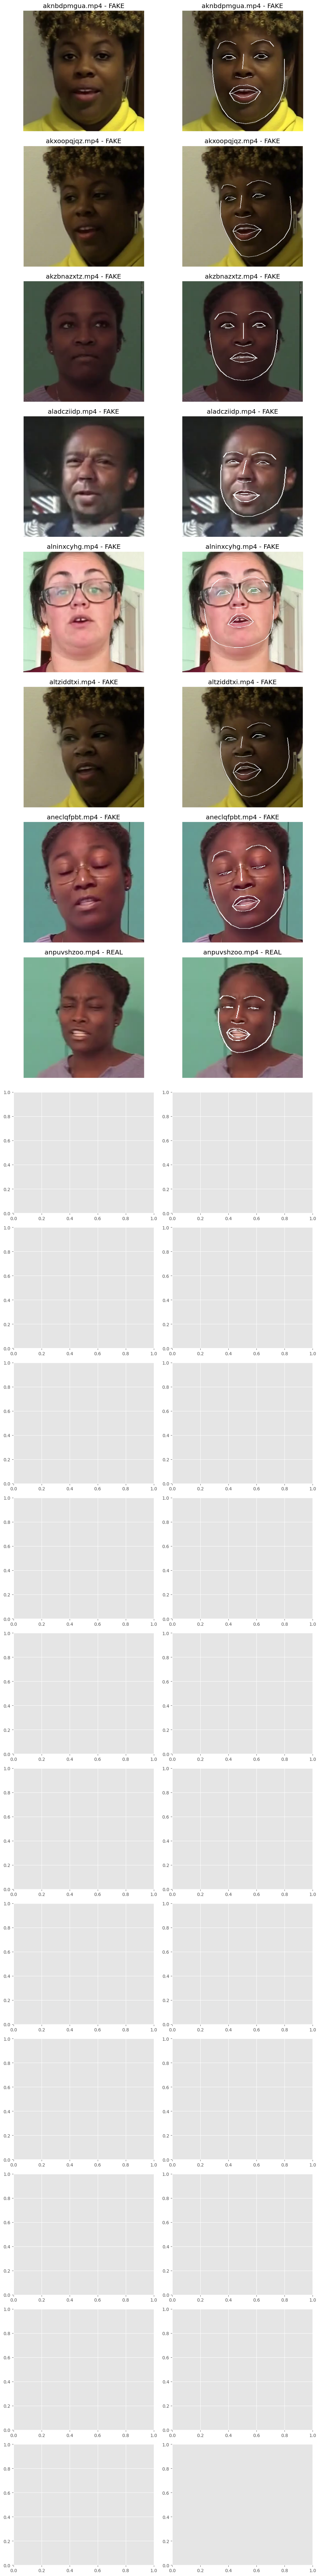

In [ ]:
fig, axs = plt.subplots(19, 2, figsize=(10, 80))
axs = np.array(axs)
axs = axs.reshape(-1)
i = 0
pad = 60
for fn in train_sample_metadata.index[23:44]:
    label = train_sample_metadata.loc[fn]['label']
    orig = train_sample_metadata.loc[fn]['label']
    video_file = f'train_sample_videos/{fn}'
    ax = axs[i]
    cap = cv.VideoCapture(video_file)
    success, image = cap.read()
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    face_locations = face_recognition.face_locations(image)
    if len(face_locations) > 0:
        # Print first face
        face_location = face_locations[0]
        top, right, bottom, left = face_location
        face_image = image[top-pad:bottom+pad, left-pad:right+pad]
        ax.imshow(face_image)
        ax.grid(False)
        ax.title.set_text(f'{fn} - {label}')
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        # Find landmarks
        face_landmarks_list = face_recognition.face_landmarks(face_image)
        try:
            face_landmarks = face_landmarks_list[0]
            pil_image = Image.fromarray(face_image)
            d = ImageDraw.Draw(pil_image)
            for facial_feature in face_landmarks.keys():
                d.line(face_landmarks[facial_feature], width=2, fill='white')
            landmark_face_array = np.array(pil_image)
            ax2 = axs[i+1]
            ax2.imshow(landmark_face_array)
            ax2.grid(False)
            ax2.title.set_text(f'{fn} - {label}')
            ax2.xaxis.set_visible(False)
            ax2.yaxis.set_visible(False)
            i += 2
        except:
            pass
plt.grid(False)
plt.tight_layout()
plt.show()

# Frame by Frame Face Detection
- The real power may come from looking at how the "face" changes or doesn't change as the video progresses
- We will take the FAKE example video `akxoopqjqz.mp4`
- First we will loop through the frames of the video file and append them to a list called `frames`

In [ ]:
video_file = 'train_sample_videos/akxoopqjqz.mp4'

cap = cv2.VideoCapture(video_file)

frames = []
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        frames.append(frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
cap.release()

print('The number of frames saved: ', len(frames))

The number of frames saved:  300


Now we can display some of the frames of this video

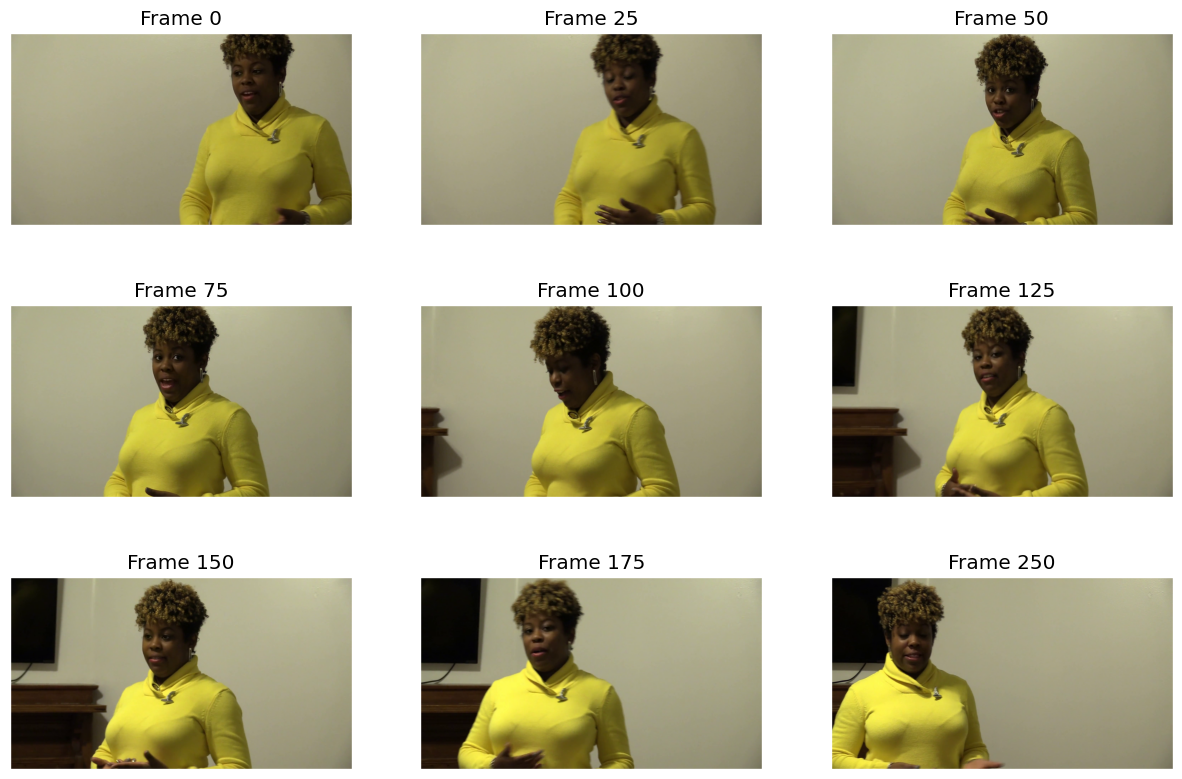

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = np.array(axes)
axes = axes.reshape(-1)

ax_ix = 0
for i in [0, 25, 50, 75, 100, 125, 150, 175, 250]:
    frame = frames[i]
    #fig, ax = plt.subplots(1,1, figsize=(5, 5))
    image = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
    axes[ax_ix].imshow(image)
    axes[ax_ix].xaxis.set_visible(False)
    axes[ax_ix].yaxis.set_visible(False)
    axes[ax_ix].set_title(f'Frame {i}')
    ax_ix += 1
plt.grid(False)
plt.show()

Now we can use the face detection to pull the faces from each frame in the video. Notice that the face coun't be detected for one of the frames.

Could not find face in frame 100


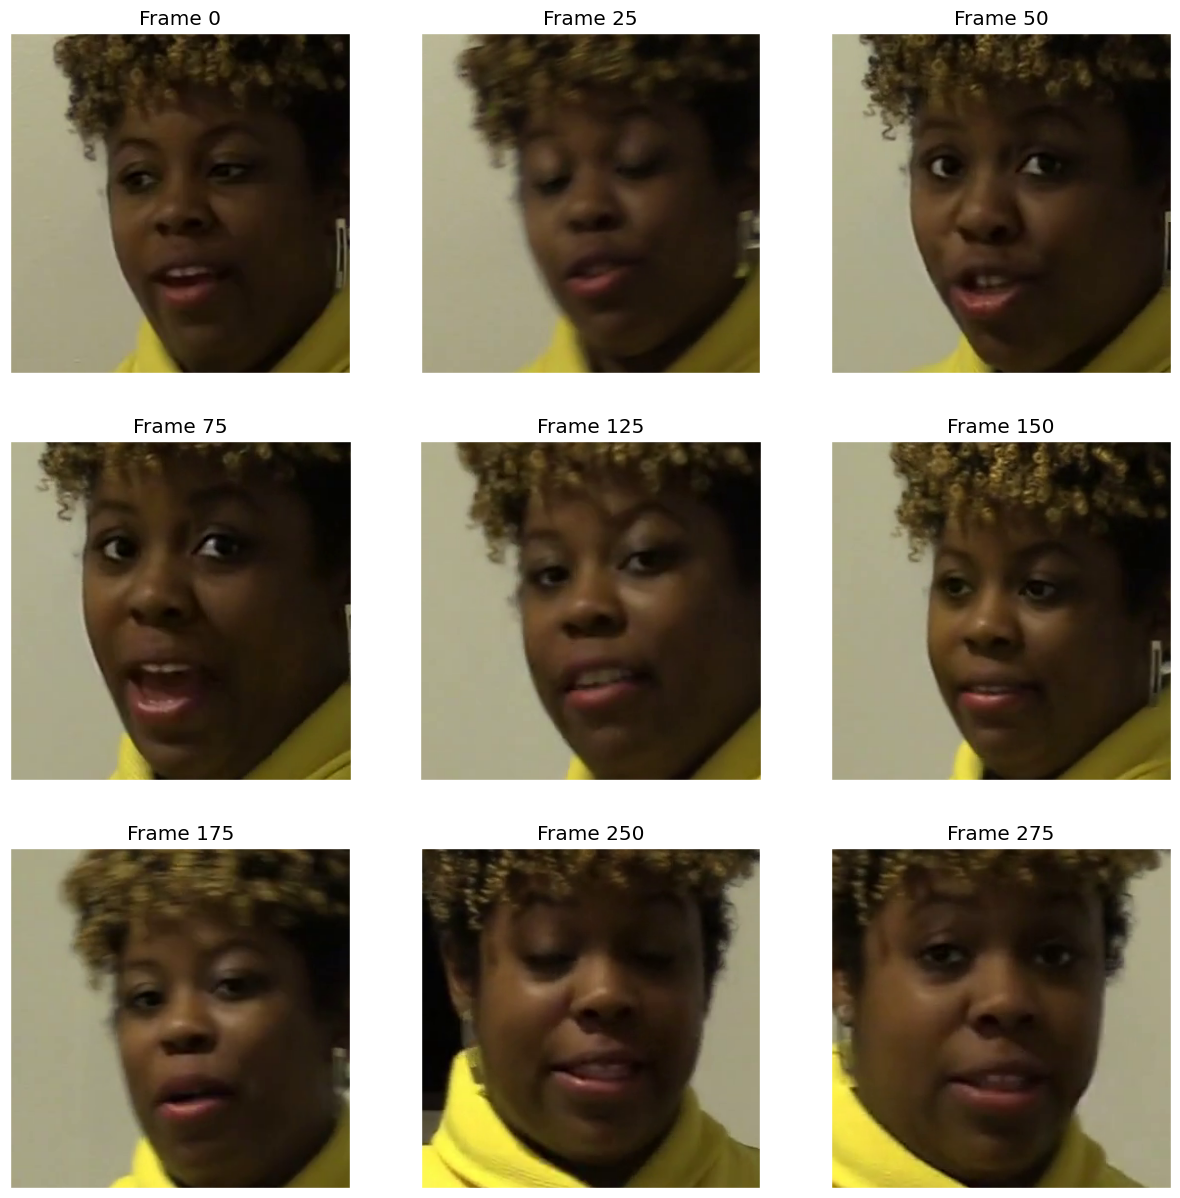

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = np.array(axes)
axes = axes.reshape(-1)
ax_ix = 0
padding = 40
for i in [0, 25, 50, 75, 100, 125, 150, 175, 250, 275]:
    frame = frames[i]
    #fig, ax = plt.subplots(1,1, figsize=(5, 5))
    face_locations = face_recognition.face_locations(frame)
    if len(face_locations) == 0:
        print(f'Could not find face in frame {i}')
        continue
    top, right, bottom, left = face_locations[0]
    frame_face = frame[top-padding:bottom+padding, left-padding:right+padding]
    image = cv.cvtColor(frame_face, cv.COLOR_BGR2RGB)
    axes[ax_ix].imshow(image)
    axes[ax_ix].xaxis.set_visible(False)
    axes[ax_ix].yaxis.set_visible(False)
    axes[ax_ix].set_title(f'Frame {i}')
    ax_ix += 1
plt.grid(False)
plt.show()

## Plotting facial landmarks for each frame

Count find face in frame 100
Could not identify face landmarks for frame 125


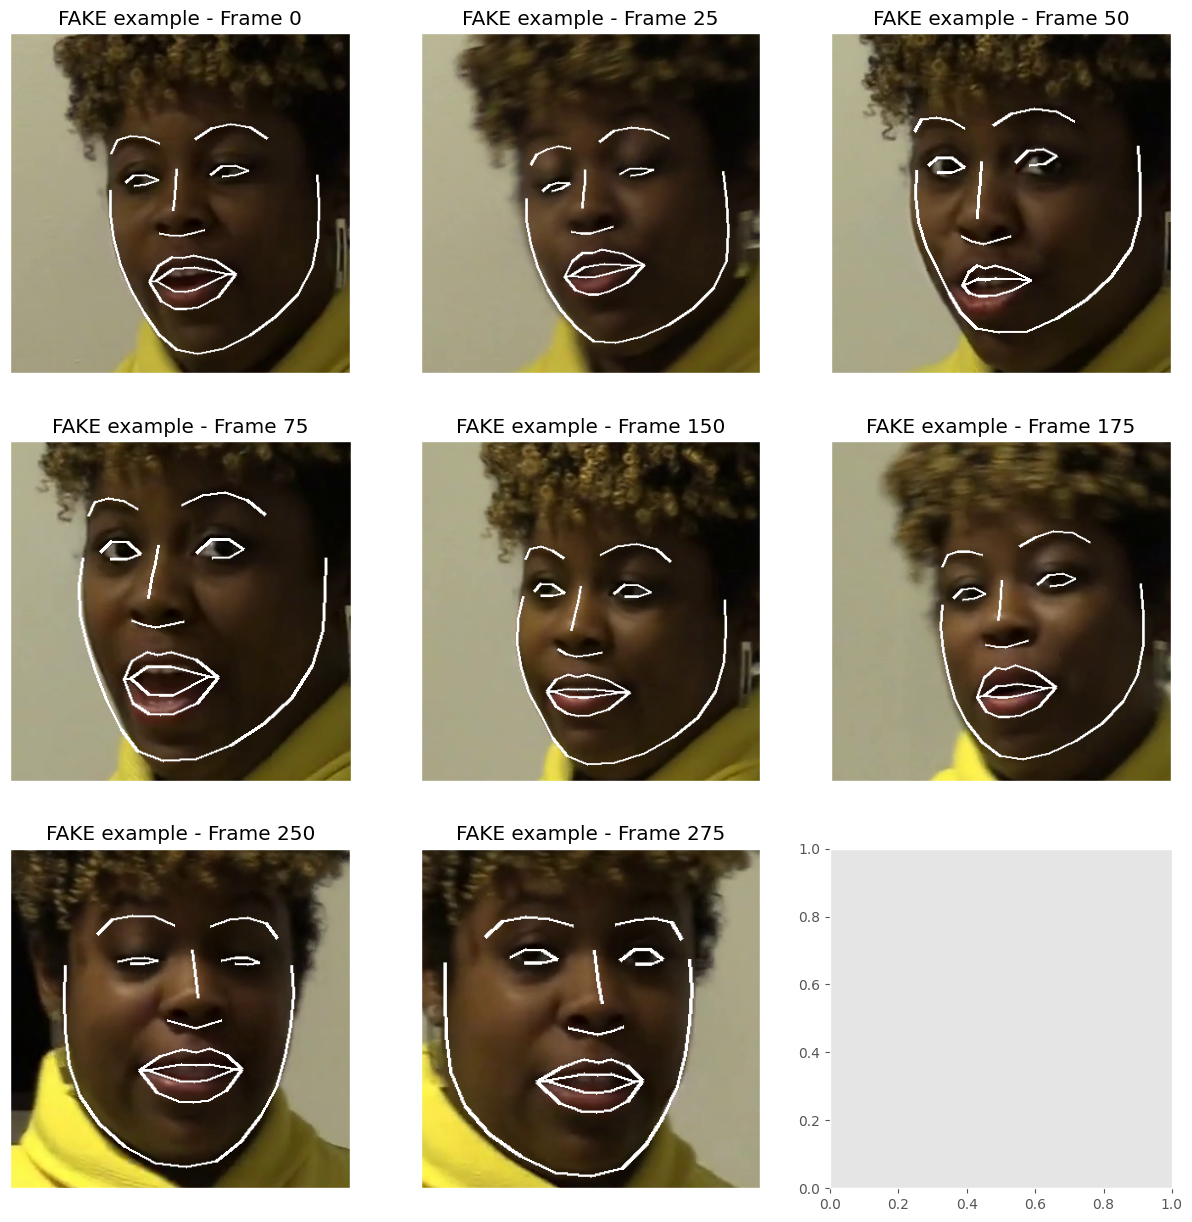

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = np.array(axes)
axes = axes.reshape(-1)
ax_ix = 0
padding = 40
for i in [0, 25, 50, 75, 100, 125, 150, 175, 250, 275]:
    frame = frames[i]
    #fig, ax = plt.subplots(1,1, figsize=(5, 5))
    face_locations = face_recognition.face_locations(frame)
    if len(face_locations) == 0:
        print(f'Count find face in frame {i}')
        continue
    top, right, bottom, left = face_locations[0]
    frame_face = frame[top-padding:bottom+padding, left-padding:right+padding]
    face_landmarks_list = face_recognition.face_landmarks(frame_face)
    if len(face_landmarks_list) == 0:
        print(f'Could not identify face landmarks for frame {i}')
        continue
    face_landmarks = face_landmarks_list[0]
    pil_image = Image.fromarray(frame_face)
    d = ImageDraw.Draw(pil_image)
    for facial_feature in face_landmarks.keys():
        d.line(face_landmarks[facial_feature], width=3, fill='white')
    landmark_face_array = np.array(pil_image)
    image = cv.cvtColor(landmark_face_array, cv.COLOR_BGR2RGB)
    axes[ax_ix].imshow(image)
    axes[ax_ix].grid(False)
    axes[ax_ix].set_title(f'FAKE example - Frame {i}')
    axes[ax_ix].xaxis.set_visible(False)
    axes[ax_ix].yaxis.set_visible(False)
    ax_ix += 1
plt.grid(False)
plt.show()

## Frame by frame of REAL example

The number of frames saved:  300
Could not identify face landmarks for frame 75
Could not identify face landmarks for frame 100
Could not identify face landmarks for frame 125
Could not identify face landmarks for frame 150
Could not identify face landmarks for frame 175
Could not identify face landmarks for frame 250
Could not identify face landmarks for frame 275


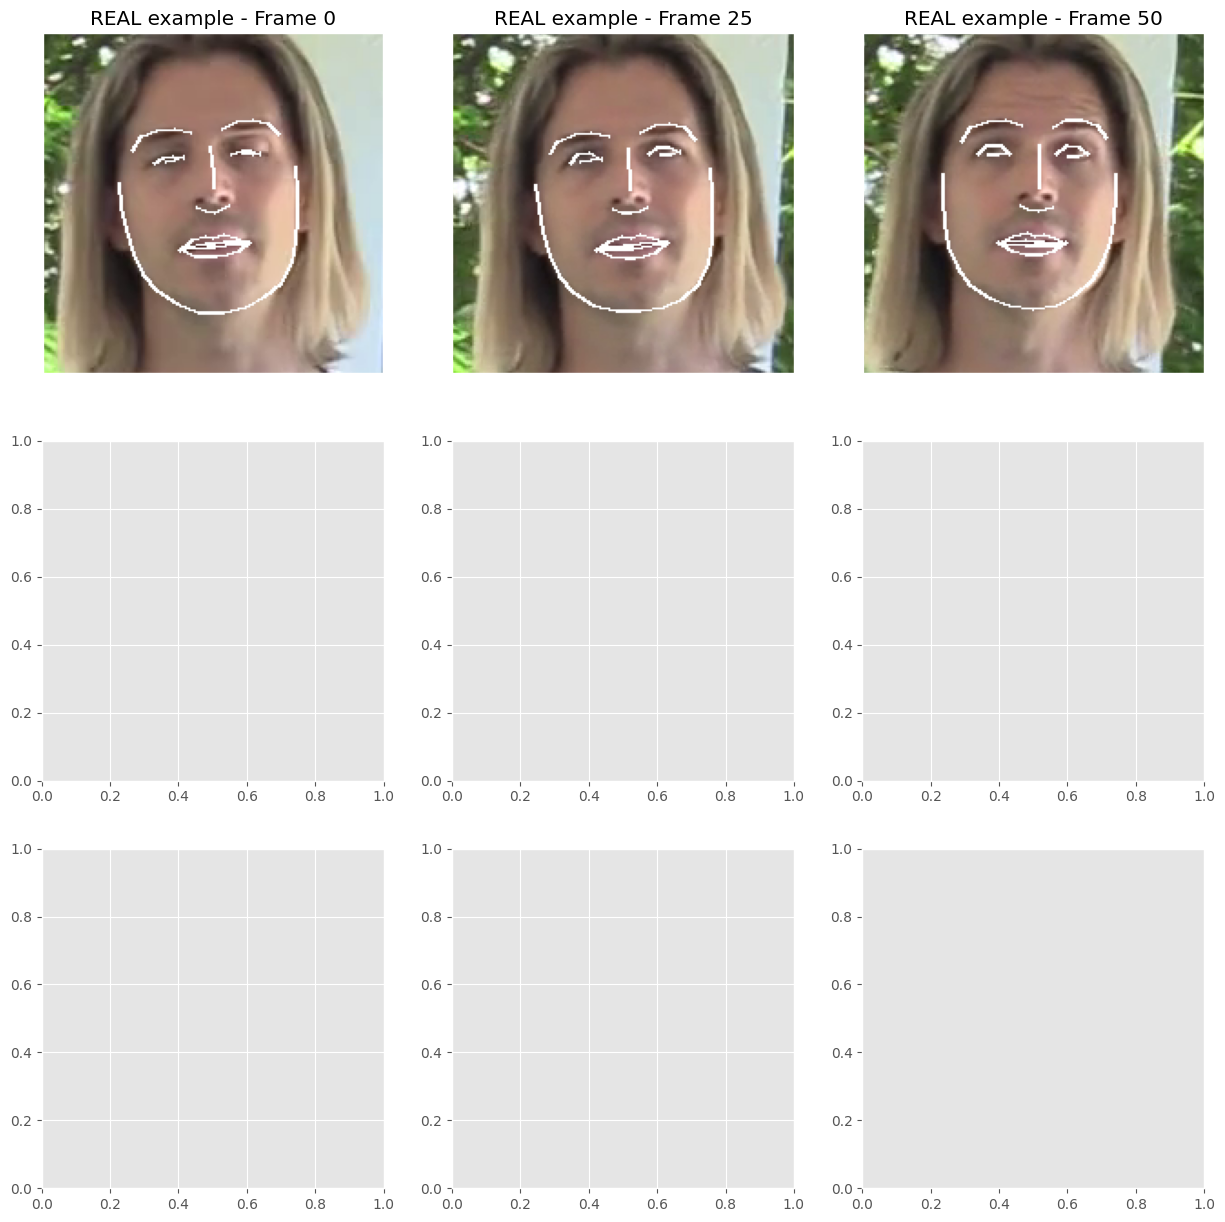

In [ ]:
fn = 'ahqqqilsxt.mp4'
video_file = f'train_sample_videos/{fn}'

cap = cv2.VideoCapture(video_file)

frames = []
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        frames.append(frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
cap.release()

print('The number of frames saved: ', len(frames))

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = np.array(axes)
axes = axes.reshape(-1)
ax_ix = 0
padding = 40
for i in [0, 25, 50, 75, 100, 125, 150, 175, 250, 275]:
    frame = frames[i]
    #fig, ax = plt.subplots(1,1, figsize=(5, 5))
    face_locations = face_recognition.face_locations(frame)
    if len(face_locations) == 0:
        print(f'Count find face in frame {i}')
        continue
    top, right, bottom, left = face_locations[0]
    frame_face = frame[top-padding:bottom+padding, left-padding:right+padding]
    face_landmarks_list = face_recognition.face_landmarks(frame_face)
    if len(face_landmarks_list) == 0:
        print(f'Could not identify face landmarks for frame {i}')
        continue
    face_landmarks = face_landmarks_list[0]
    pil_image = Image.fromarray(frame_face)
    d = ImageDraw.Draw(pil_image)
    for facial_feature in face_landmarks.keys():
        d.line(face_landmarks[facial_feature], width=2, fill='white')
    landmark_face_array = np.array(pil_image)
    image = cv.cvtColor(landmark_face_array, cv.COLOR_BGR2RGB)
    axes[ax_ix].imshow(image)
    axes[ax_ix].grid(False)
    axes[ax_ix].set_title(f'REAL example - Frame {i}')
    axes[ax_ix].xaxis.set_visible(False)
    axes[ax_ix].yaxis.set_visible(False)
    ax_ix += 1
    if ax_ix >= len(axes):
        break
plt.grid(False)
plt.show()

## Sample Submission
- Lets use the distribution in the training make a guess on the test set.
- We are predicting the probability that the video is a **fake**.
- 80.75% of the training videos are fake. Turns out the test set does not share the same distribution, as predicting 0.80 scores worse than simply guessing 0.5

In [ ]:
ss = pd.read_csv("sample_submission.csv")
ss['label'] = 0.5
ss.loc[ss['filename'] == 'aassnaulhq.mp4', 'label'] = 0 # Guess the true value
ss.loc[ss['filename'] == 'aayfryxljh.mp4', 'label'] = 0
ss.to_csv('submission.csv', index=False)

In [ ]:
ss.head(25)

filename  label
0  aassnaulhq.mp4    0.0
1  aayfryxljh.mp4    0.0
2  acazlolrpz.mp4    0.5
3  adohdulfwb.mp4    0.5
4  ahjnxtiamx.mp4    0.5